# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

At this project we try to scrap ethereum sales volume from coingecko data center website. CoinGecko is a digital currency price and information data platform. It helps its users quantitatively evaluate and rank their coins. CoinGecko is a Singapore-based company. We will try to scrap this sites for educational purpose only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good enough visualisation. Let's say we have task to make a forecast on Ethereum Price. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public.

We will scrap 4 points from this sites. One is the Market Cap, market capitalization (or market cap) is the total value of all the coins that have been mined. It's calculated by multiplying the number of coins in circulation by the current market price of a single coin. Second is Volume, Volume is the amount of currency traded over a period of time. Third is Open, refer to the price at which a cryptocurrency opens at a time period. Last is Close, refer to the price at which a cryptocurrency closes at a time period



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our get_url object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpose we slice to only see first 500 character.

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | 


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. The information that we need are the date, market cap, volume, opening and closing price which contain in the table. To know which part of the code refer to that table, we can just move our cusor there, right click, and inspect element. Then we will see the HTML code.


From inspect element we know that we need to find the line table with class table table-striped text-sm text-lg-normal. We can use the find method at our beautifusoup object. Let's also call our object to see what we get.

In [5]:
table_eth = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'}).find('tbody').find_all('tr')
table_eth[:5]

[<tr>
 <th class="font-semibold text-center" scope="row">2021-06-30</th>
 <td class="text-center">
 $253,607,549,372
 </td>
 <td class="text-center">
 $27,149,143,847
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 <td class="text-center">
 N/A
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-29</th>
 <td class="text-center">
 $243,040,539,437
 </td>
 <td class="text-center">
 $30,629,329,806
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 <td class="text-center">
 $2,169.40
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-28</th>
 <td class="text-center">
 $229,354,016,311
 </td>
 <td class="text-center">
 $24,316,408,028
 </td>
 <td class="text-center">
 $1,973.93
 </td>
 <td class="text-center">
 $2,087.52
 </td>
 </tr>,
 <tr>
 <th class="font-semibold text-center" scope="row">2021-06-27</th>
 <td class="text-center">
 $209,989,265,221
 </td>
 <td class="text-center">
 $24,249,510,321
 </td>
 <td class="text-cente

Finding row length.

In [6]:
len(table_eth)

60

## Extract elements of the table

Extract all the information which is necessary. In this case we have 5 information, "Date, Market_Cap, Volume, Open, Close"

In [7]:
# Date
table_eth[0].find_all('th')[0].get_text()

'2021-06-30'

In [8]:
# Market Cap
table_eth[0].find_all('td')[0].get_text().strip()

'$253,607,549,372'

In [9]:
# Volume
table_eth[0].find_all('td')[1].get_text().strip()

'$27,149,143,847'

In [10]:
#Open
table_eth[0].find_all('td')[2].get_text().strip()

'$2,169.40'

In [11]:
#Close
table_eth[0].find_all('td')[3].get_text().strip()

'N/A'

- Do the scrapping process here. Put everything together For Loop. 
- We will make a loop from one until the the length of the table row,
- Which we will find all cell of the column one to five which contain "Date, Market_Cap, Volume, Open, Close".
- Then we will append it to our tuple that we prepared before,
- Every one iteration we will scrap one line of the table.

In [12]:
Date =[]
Market_Cap = []
Volume = []
Open = []
Close = [] #init

for i in table_eth:
    #Date
    Date.append(i.find_all('th')[0].get_text())
    
    #Market Cap
    Market_Cap.append(i.find_all('td')[0].get_text().strip().replace('$','').replace(',','').replace('.',''))
    
    #Volume
    Volume.append(i.find_all('td')[1].get_text().strip().replace('$','').replace(',','').replace('.',''))
    
    #Open
    Open.append(i.find_all('td')[2].get_text().strip().replace('$','').replace(',','').replace('.',''))
    
    #Close
    Close.append(i.find_all('td')[3].get_text().strip().replace('$','').replace(',','').replace('.',''))

## Creating data frame & Data wrangling

Put the array into dataframe

In [13]:
import pandas as pd

result = pd.DataFrame({'Date': Date, 'Market Cap': Market_Cap, 'Volume': Volume, 'Open': Open, 'Close': Close})
result.head()

,Date,Market Cap,Volume,Open,Close
0,2021-06-30,253607549372,27149143847,216940,N/A
1,2021-06-29,243040539437,30629329806,208752,216940
2,2021-06-28,229354016311,24316408028,197393,208752
3,2021-06-27,209989265221,24249510321,181705,197393
4,2021-06-26,213871849532,25981381067,183346,181705


In [14]:
result.shape

(60, 5)

In [15]:
result.dtypes

Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

Do the data cleaning here. We need to replace the "N/A" to "NaN in order to be able to convert into float. Then lastly let's fix our data type.

In [16]:
result['Close'] = result['Close'].replace('N/A', 'NaN')
result

,Date,Market Cap,Volume,Open,Close
0,2021-06-30,253607549372,27149143847,216940,NaN
1,2021-06-29,243040539437,30629329806,208752,216940
2,2021-06-28,229354016311,24316408028,197393,208752
3,2021-06-27,209989265221,24249510321,181705,197393
4,2021-06-26,213871849532,25981381067,183346,181705
5,2021-06-25,231644258719,22447489242,199008,183346
6,2021-06-24,229518675837,28098744045,197111,199008
7,2021-06-23,216876757209,38755019937,187536,197111
8,2021-06-22,223202708789,39499960408,190012,187536
9,2021-06-21,261478202409,26235850447,225156,190012


In [17]:
result['Date'] = result['Date'].astype('datetime64')
result['Market Cap'] = result['Market Cap'].astype('float64')
result['Volume'] = result['Volume'].astype('float64')
result['Open'] = result['Open'].astype('float64')
result['Close'] = result['Close'].astype('float64')

In [18]:
result.dtypes

Date          datetime64[ns]
Market Cap           float64
Volume               float64
Open                 float64
Close                float64
dtype: object

Then, we need to input the blank cell using "Fillna"

In [19]:
result.fillna(method='bfill').head(10)

,Date,Market Cap,Volume,Open,Close
0,2021-06-30,2.536075e+11,2.714914e+10,216940.0,216940.0
1,2021-06-29,2.430405e+11,3.062933e+10,208752.0,216940.0
2,2021-06-28,2.293540e+11,2.431641e+10,197393.0,208752.0
3,2021-06-27,2.099893e+11,2.424951e+10,181705.0,197393.0
4,2021-06-26,2.138718e+11,2.598138e+10,183346.0,181705.0
5,2021-06-25,2.316443e+11,2.244749e+10,199008.0,183346.0
6,2021-06-24,2.295187e+11,2.809874e+10,197111.0,199008.0
7,2021-06-23,2.168768e+11,3.875502e+10,187536.0,197111.0
8,2021-06-22,2.232027e+11,3.949996e+10,190012.0,187536.0
9,2021-06-21,2.614782e+11,2.623585e+10,225156.0,190012.0


## Data Visualisation

Visualisation our data with the help of the .plot() function.
First of all, we need to set "Date" as index. Then make graph for each variable

In [20]:
result = result.set_index('Date')

<AxesSubplot:xlabel='Date'>

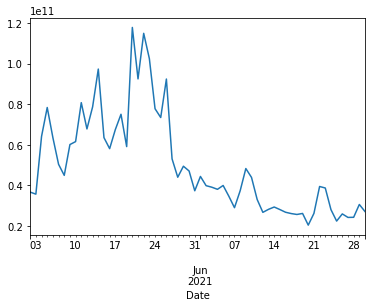

In [21]:
result['Volume'].plot()

Insight:
- Volume transaksi ethereum pada Mei-Juli 2021 sangat fluktuatif, 
- Lonjakan volume transaksi ethereum terjadi pada minggu ketiga bulan Mei
- Setelah minggu ketiga, volume transaksi perlahan-lahan turun sampai di akhir bulan Juni

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Summary:
- Beautiful soup adalah salah satu library di Python yang digunakan untuk melakukan scrapping data di website
- Pada saat melakukan scrapping dengan beautiful soup perlu mengetahui struktur web dan bagian-bagian mana saja yang datanya akan diambil
- Untuk melihat struktur web yang akan discrapping, kita perlu membuka link pada web browser dan melakukan inspect element dengan klik kanan lalu pilih inspect.
- Salah satu fungsi dari BeautifulSoup adalah untuk merapikan file html dengan memberikan identasi dan newline. Syntaxnya adalah soup.prettify()
- Define variable baru yang kita temukan dengan menggunakan fungsi find() dari Library BeautifulSoup. Fungsi find() akan mengambil data berdasarkan tag HTML.
- Untuk mengambil konten HTML dengan tag yang sama dapat menggunakan fungsi find_all()
- Data yang telah diambil dapat dibuat dataframe dengan pd.DataFrame() dan selanjutkan dapat diolah (cleaning) dan analisis

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.